# Real Estate Housing Price Forecast_ Brainstation_Capstone Project

## Scope:
Real estate market in the United States for single house families of condo/ coop, and house from 1 bedroom to 5+  bedrooms


## Dataset:
- 523 columns containing typical value in USD for all single-family homes in the respective cities monthly for condo/coops, and homes with 1, 2, 3, 4 and 5+ bedrooms
- 1 columns con containing typical value in USD for all single-family homes in the United States monthly for condo/coops, and homes with 1, 2, 3, 4 and 5+ bedrooms
- Data Source: Contains if the row value corresponds to condo/coops,  or homes with 1, 2, 3, 4 and 5+ bedrooms
- Date: Contains date, by month
- Interest Rate: It is the percent of interest rate for the respective month in US
- Pop_Level: Count the population level in US in thousands of Persons
- Working Age Population: Count of working age population in the US
- Employment Ratio: Percentage of employment in the US
- GDP: Quarterly measurement of Gross Domestic Product in the US




## Notes: 
- Data was taken from different sources and merged together to see the effect of different factors in single family house predicton

## References:
- https://www.zillow.com/research/data/
- https://fred.stlouisfed.org/tags/series?t=interest+rate%3Bmonthly%3Busa
- https://fred.stlouisfed.org/series/FEDFUNDS
- https://fred.stlouisfed.org/series/GDP
- https://fred.stlouisfed.org/series/CNP16OV
- https://fred.stlouisfed.org/series/LFWA64TTUSM647S
- https://fred.stlouisfed.org/series/EMRATIO

# Notebook:

### 1. Data Preparation

In [113]:
# Importing libraries for notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [114]:
# Reading the dataset in pandas DataFrame

file='231009_Dataset_RE.xlsx'
df = pd.read_excel(file)

In [115]:
# Display the first 5 rows of the dataframe
df.head()

,Data Source,Date,United States,"New York, NY","Los Angeles, CA","Chicago, IL","Dallas, TX","Houston, TX","Washington, DC","Philadelphia, PA",...,"Los Alamos, NM","Spirit Lake, IA","Spencer, IA","Fairfield, IA","Ketchikan, AK",Interest Rates Percentage,Pop_Level,Working Age Population,Employment Ratio Percentage,GDP
0,ZHVI Condo/Co-op,2000-01-31,117347.473913,187974.271420,173372.334246,130020.379809,86541.694145,84873.098887,121361.967946,93103.779757,...,NaN,NaN,NaN,NaN,NaN,5.73,211576,1.783418e+08,64.6,NaN
1,ZHVI 1-Bed,2000-01-31,75086.605645,129188.452183,122289.554093,95084.612935,62264.955926,71617.302625,104820.265095,79069.765755,...,NaN,78733.541289,33916.118705,NaN,NaN,5.73,211576,1.783418e+08,64.6,NaN
2,ZHVI 2-Bed,2000-01-31,84066.548439,148096.356791,169506.426525,103188.460770,70130.894803,72736.508189,124617.295993,92866.594246,...,NaN,NaN,NaN,NaN,NaN,5.73,211576,1.783418e+08,64.6,NaN
3,ZHVI 3-Bed,2000-01-31,115077.056785,192494.604544,214788.471884,130028.969963,102453.573326,100505.814807,148272.896844,102075.145921,...,NaN,NaN,NaN,NaN,NaN,5.73,211576,1.783418e+08,64.6,NaN
4,ZHVI 4-Bed,2000-01-31,170084.805012,255907.857662,280417.768603,207092.913059,178238.174429,163813.717839,219752.013691,186983.372940,...,NaN,NaN,NaN,NaN,NaN,5.73,211576,1.783418e+08,64.6,NaN


In [116]:
# Get the shape of the dataset (number of rows, number of columns)
df.shape

(1704, 531)

In [117]:
# In order In order to organize better and minimize the number of columns, all locations- cities and Country values home prices values- the columns with locations will be stacked
# and combined into one column for property price values and another for the name of the location

# Specify the columns to use as index columns
index_columns = ['Data Source', 'Date', 'Interest Rates Percentage', 'GDP', 'Pop_Level','Working Age Population', 'Employment Ratio Percentage' ]

# List of columns to stack
columns_to_stack = [col for col in df.columns if col not in index_columns]

# Use of melt function to stack the specified columns into a single column
stacked_df = pd.melt(df, id_vars=index_columns, value_vars=columns_to_stack, var_name='Location', value_name='single-family home $')

In [118]:
# Looking at the shape of the new stacked dataframe
stacked_df.shape

(892896, 9)

In [119]:
# Observing the first 20 rows of the stacked dataframe
stacked_df.head(20)

,Data Source,Date,Interest Rates Percentage,GDP,Pop_Level,Working Age Population,Employment Ratio Percentage,Location,single-family home $
0,ZHVI Condo/Co-op,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,117347.473913
1,ZHVI 1-Bed,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,75086.605645
2,ZHVI 2-Bed,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,84066.548439
3,ZHVI 3-Bed,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,115077.056785
4,ZHVI 4-Bed,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,170084.805012
5,ZHVI 5-Bed,2000-01-31,5.73,NaN,211576,1.783418e+08,64.6,United States,233515.778638
6,ZHVI Condo/Co-op,2000-02-29,5.85,NaN,211772,1.784040e+08,64.6,United States,117618.284287
7,ZHVI 1-Bed,2000-02-29,5.85,NaN,211772,1.784040e+08,64.6,United States,75259.564050
8,ZHVI 2-Bed,2000-02-29,5.85,NaN,211772,1.784040e+08,64.6,United States,84220.407310
9,ZHVI 3-Bed,2000-02-29,5.85,NaN,211772,1.784040e+08,64.6,United States,115274.260682


In [120]:
# Optional code to download new dataframe

# stacked_df.to_excel('stacked_dataframe.xlsx', index=False)

In [121]:
# Getting a summary of the stacked dataset statistics
stacked_df.describe()

# Note: At this point, single-family home $ is mixing the values of cities with the values nation wide ( US)

,Interest Rates Percentage,GDP,Pop_Level,Working Age Population,Employment Ratio Percentage,single-family home $
count,889752.000000,292392.000000,892896.000000,8.897520e+05,892896.000000,2.705120e+05
mean,1.722226,16684.890613,241055.257042,1.980876e+08,60.596831,1.641938e+05
std,1.904986,4393.450431,16144.435203,8.552082e+06,2.122323,1.299196e+05
min,0.050000,10247.720000,211576.000000,1.783418e+08,51.300000,1.709753e+04
25%,0.140000,13599.160000,227521.000000,1.921451e+08,58.800000,8.591117e+04
50%,1.030000,15842.259000,240512.500000,2.004187e+08,60.250000,1.276575e+05
75%,2.490000,19692.595000,255811.750000,2.054807e+08,62.500000,1.940050e+05
max,6.540000,27063.012000,267428.000000,2.089349e+08,64.700000,2.131263e+06


In [122]:
# Checking data types of columns
stacked_df.dtypes

Data Source                            object
Date                           datetime64[ns]
Interest Rates Percentage             float64
GDP                                   float64
Pop_Level                               int64
Working Age Population                float64
Employment Ratio Percentage           float64
Location                               object
single-family home $                  float64
dtype: object

In [123]:
# Now, we will divide the stacked_df into two new dataframes, one will contain only data related to United States,
# the second dataframe will have all cities.

condition= stacked_df['Location'] == 'United States'

nation_df=stacked_df[condition]

cities_df=stacked_df[~condition]

In [124]:
# Verifying the values of nation_df
nation_df.describe(include='all')

C:\Users\Acer\AppData\Local\Temp/ipykernel_44732/1205993326.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nation_df.describe(include='all')


,Data Source,Date,Interest Rates Percentage,GDP,Pop_Level,Working Age Population,Employment Ratio Percentage,Location,single-family home $
count,1704,1704,1698.000000,558.000000,1704.000000,1.698000e+03,1704.000000,1704,1704.000000
unique,6,284,NaN,NaN,NaN,NaN,NaN,1,NaN
top,ZHVI Condo/Co-op,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,United States,NaN
freq,284,6,NaN,NaN,NaN,NaN,NaN,1704,NaN
first,NaN,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.722226,16684.890613,241055.257042,1.980876e+08,60.596831,NaN,226411.066770
std,NaN,NaN,1.905546,4397.384994,16149.165463,8.554597e+06,2.122945,NaN,112441.083127
min,NaN,NaN,0.050000,10247.720000,211576.000000,1.783418e+08,51.300000,NaN,75086.605645
25%,NaN,NaN,0.140000,13599.160000,227521.000000,1.921451e+08,58.800000,NaN,145288.611412


In [125]:
# Looking and nation_df shape
nation_df.shape

(1704, 9)

In [126]:
# Check for missing values for nation_df
nation_df.isnull().sum()

# Note: GDP had null values because the meaurement of GDP is done Quarterly

Data Source                       0
Date                              0
Interest Rates Percentage         6
GDP                            1146
Pop_Level                         0
Working Age Population            6
Employment Ratio Percentage       0
Location                          0
single-family home $              0
dtype: int64

In [127]:
# Verifying the values of cities_df
cities_df.describe(include='all')

C:\Users\Acer\AppData\Local\Temp/ipykernel_44732/1107019421.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cities_df.describe(include='all')


,Data Source,Date,Interest Rates Percentage,GDP,Pop_Level,Working Age Population,Employment Ratio Percentage,Location,single-family home $
count,891192,891192,888054.000000,291834.000000,891192.000000,8.880540e+05,891192.000000,891192,2.688080e+05
unique,6,284,NaN,NaN,NaN,NaN,NaN,523,NaN
top,ZHVI Condo/Co-op,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,"New York, NY",NaN
freq,148532,3138,NaN,NaN,NaN,NaN,NaN,1704,NaN
first,NaN,2000-01-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-08-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.722226,16684.890613,241055.257042,1.980876e+08,60.596831,NaN,1.637994e+05
std,NaN,NaN,1.904986,4393.450445,16144.435221,8.552082e+06,2.122323,NaN,1.299281e+05
min,NaN,NaN,0.050000,10247.720000,211576.000000,1.783418e+08,51.300000,NaN,1.709753e+04
25%,NaN,NaN,0.140000,13599.160000,227521.000000,1.921451e+08,58.800000,NaN,8.564585e+04


In [128]:
# Check for missing values in cities_df
cities_df.isnull().sum()

# Note: We can see that single-family home values have a significant amount of null values, we will look at the cities that have a
# considerable number of null values and evaluate if we want to keep them or remove them for the analysis

Data Source                         0
Date                                0
Interest Rates Percentage        3138
GDP                            599358
Pop_Level                           0
Working Age Population           3138
Employment Ratio Percentage         0
Location                            0
single-family home $           622384
dtype: int64

In [129]:
# Looking at cities_df shape
cities_df.shape

(891192, 9)

In [130]:
# Group byLocation, count null values in Single-Family Home value, and organized in ascending order
cities_null = cities_df.groupby('Location')['single-family home $'].apply(lambda x: x.isnull().sum()).reset_index()
cities_null.columns = ['Location', 'Null_Count']
cities_null = cities_null.sort_values(by='Null_Count', ascending=False)

# Print the result
print(cities_null)

             Location  Null_Count
77       Cadillac, MI        1696
243       Kearney, NE        1629
187  Grand Island, NE        1618
171  Fort Madison, IA        1618
364   Parkersburg, WV        1612
..                ...         ...
280   Los Angeles, CA           0
339      New York, NY           0
379      Portland, OR           0
133        Denver, CO           0
92      Charlotte, NC           0

[523 rows x 2 columns]


In [131]:
#Filtering and saving locations with null count over a 5% null single-family home $.
# In other words,  if it has more than 0.05 *1704 or over to 85 null values.
limit = 85  # Change this threshold to your the required null count limit
location_high_nulls = cities_null[cities_null['Null_Count'] > limit]['Location'].tolist()


# OPtional below code: obseve the list over the limit stablished above
# print(location_high_nulls)

# Getting the final count of the cities with null values over 5%
len(location_high_nulls)

491

In [134]:
# We found that 491 cities, have a significant amount of null values. As this QTY is considered significant for the analysis
# It is decided to drop those columns

filtered_cities_df = cities_df[~cities_df['Location'].isin(location_high_nulls)]

In [135]:
# Verifying shape of the new filtered filtered_cities_df

filtered_cities_df.shape

(54528, 9)

In [137]:
# Looking at the destription of the filtered cities_df

filtered_cities_df.describe()

,Interest Rates Percentage,GDP,Pop_Level,Working Age Population,Employment Ratio Percentage,single-family home $
count,54336.000000,17856.000000,54528.000000,5.433600e+04,54528.000000,5.450900e+04
mean,1.722226,16684.890613,241055.257042,1.980876e+08,60.596831,2.708231e+05
std,1.905002,4393.565947,16144.574203,8.552156e+06,2.122341,1.918322e+05
min,0.050000,10247.720000,211576.000000,1.783418e+08,51.300000,4.095022e+04
25%,0.140000,13599.160000,227521.000000,1.921451e+08,58.800000,1.354789e+05
50%,1.030000,15842.259000,240512.500000,2.004187e+08,60.250000,2.215796e+05
75%,2.490000,19692.595000,255811.750000,2.054807e+08,62.500000,3.457348e+05
max,6.540000,27063.012000,267428.000000,2.089349e+08,64.700000,2.131263e+06


In [138]:
# Check for additoinal missing values in cities_df
filtered_cities_df.isnull().sum()

Data Source                        0
Date                               0
Interest Rates Percentage        192
GDP                            36672
Pop_Level                          0
Working Age Population           192
Employment Ratio Percentage        0
Location                           0
single-family home $              19
dtype: int64

In [ ]:
### ToDo: Finalize null handling for filtered_cities_df

--------

### 2. Exploratory Data Analysis

### 2.1 Univariate Analysis:

#### 2.1.A - nation_df analysis

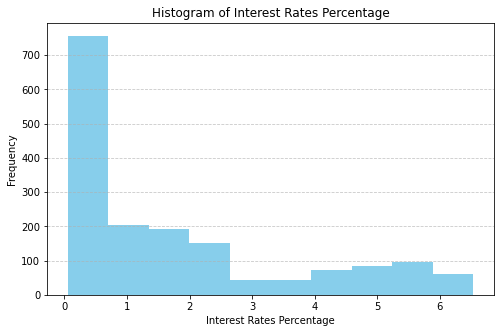

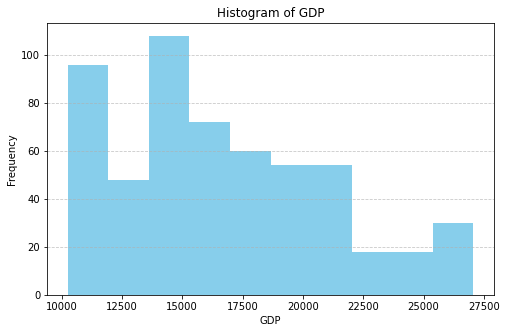

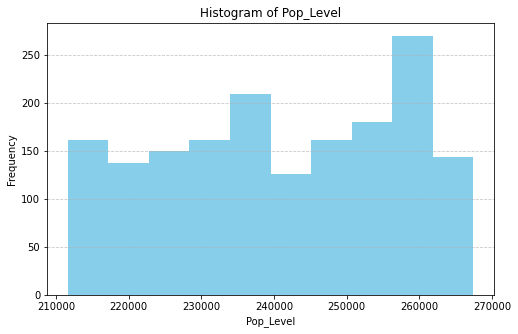

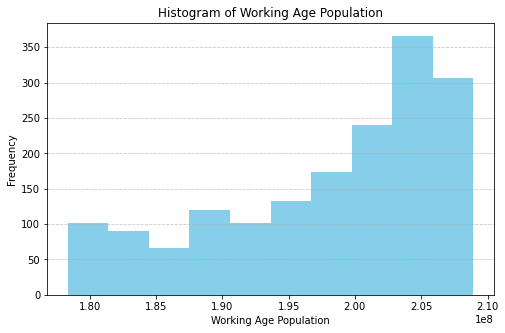

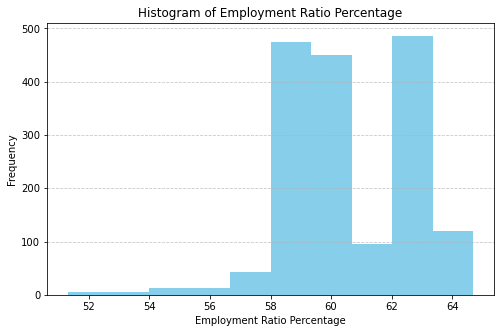

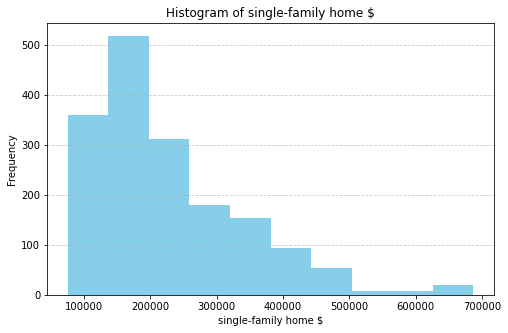

In [143]:
# First, we will start creating histograms for all numerical variables
# Getting the list of numerical column names
nation_numeric_columns = nation_df.select_dtypes(include=[int, float]).columns

# Create histograms for each numerical column
for column in nation_numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(nation_df[column], bins=10, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

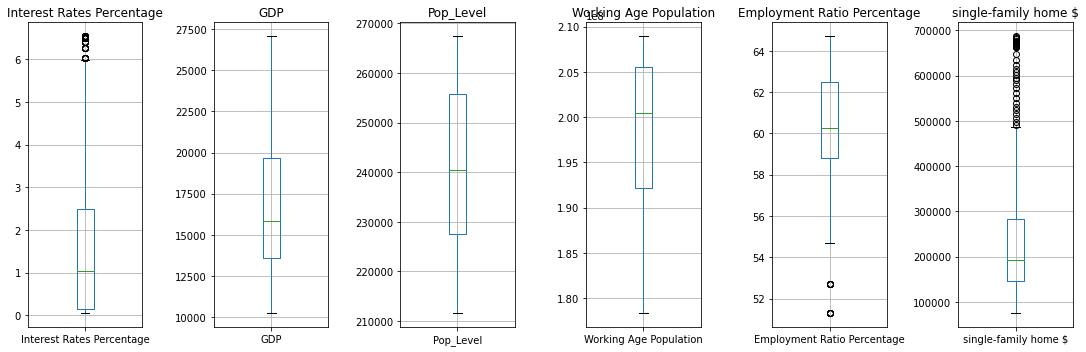

In [144]:
## Now, we will create box plots for all numerical varaibles in nation_df

# Creating subplots for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(nation_numeric_columns), figsize=(15, 5))

# Loop through numerical columns and create boxplots
for i, column in enumerate(nation_numeric_columns):
    ax = axes[i]
    nation_df.boxplot(column=column, ax=ax)
    ax.set_title(column)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

#### Observations: 
1. Interest rates and single-family home value have a right skewed distribution as well as a greater number of outliers



#### 2.1.B - cities_df analysis

In [145]:
### ToDo: Univariate analysis for cities data frame will be done after the filtered_cities_df is completely dealt with null values

### 2.2. Bivariate Analysis:

#### 2.2.A - nation_df analysis

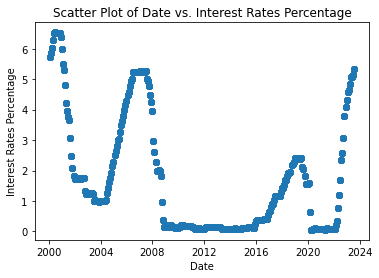

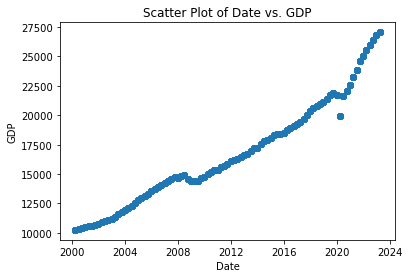

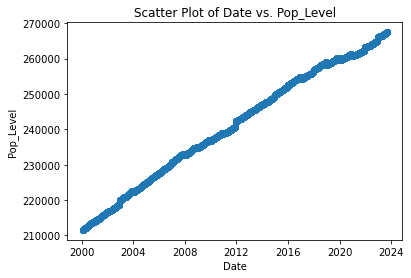

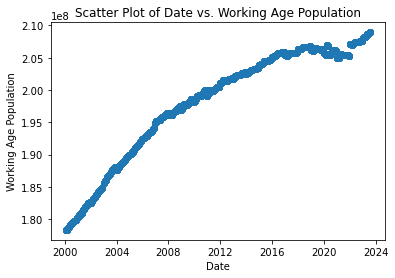

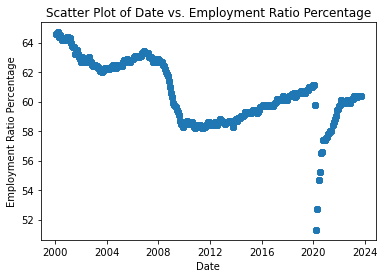

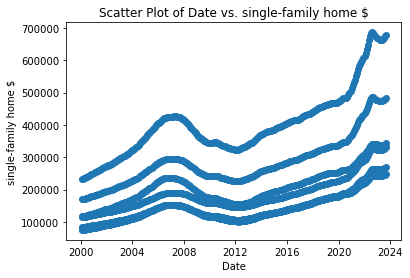

In [153]:
# We will create scatter plots to observe all numerical values Vs the date

# Create scatter plots for each numerical column against the date
for column in nation_numeric_columns:
    plt.scatter(nation_df['Date'], nation_df[column])
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'Scatter Plot of Date vs. {column}')
    plt.show()



#### Observations: 
1. It is noticible the interest rates peaks in different periods of time, it does not appear to have a time pattern
2. GDP has been steadily growing since 2000 as well as population level
3. The slope of Working age population seems to have changed in the most recent years and it looks more flat
4. Employment Ration Percentage seems to be gradually decreasing over all with a notable decrease when COVID hit.
5. Date Vs Single-family home value shows an overall increase in real estate properties. It shows 6 lines which would correspond to the data source type - condo, 1bed, 2 bed, 3 bed, 4 bed, 5+

Note: Next step is to improve the graphs, specially the chart for Date Vs Single-Family value by adding lables to each of the cities.


#### 2.2.B - cities_df analysis

In [145]:
### ToDo: Bivariate analysis for cities data frame will be done after the filtered_cities_df is completely dealt with null values

### 2.3. Correlation Analysis:

#### 2.3.A - nation_df analysis

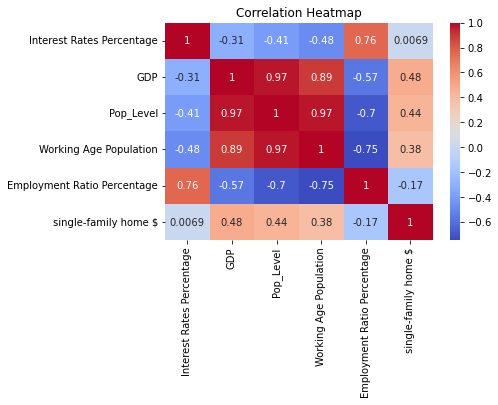

In [148]:
# Correlation matrix
correlation_matrix_nation = nation_df.corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix_nation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Observations: 
1. Single-family home values have some correlation with GDP, Population leve and Working Age Population
2. Employment Ratio Percentage has a strong correlation with Working Age Population, Population level and Interest Rates Percentage
3. Worling Age population has a strong Corrilation with Empoyment Ration Percentage, Population level, and GDP

Note: Next step is be to check for colinearity of the chosen variables


#### Hypothesis:
 Up to this point, it seems that there is certain relation of oour target variable with GDP, Population level and working age populatoin. However, while looking at the other variables correlation, there might be some that have a high change to have some colinearity


#### 2.3.B - cities_df analysis

In [154]:
### ToDo:Correlation analysis for cities data frame will be done after the filtered_cities_df is completely dealt with null values